# YOUR PROJECT TITLE

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

The Solow-model is chosen in this project. 

### Solow Growth Model Equations

The Solow growth model is a neoclassical economic model of long-run economic growth. It describes an economy with the following equations:

1. **Production Function:**
   \[
   Y = F(K, L) = K^{{\alpha}} (AL)^{{1-\alpha}}
   \]
   where:
   - \( Y \) is the output (GDP),
   - \( K \) is the capital stock,
   - \( L \) is the labor input,
   - \( A \) is total factor productivity (TFP),
   - \( \alpha \) is the output elasticity of capital.

  




## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

Steady State Capital: 183673.4693877551


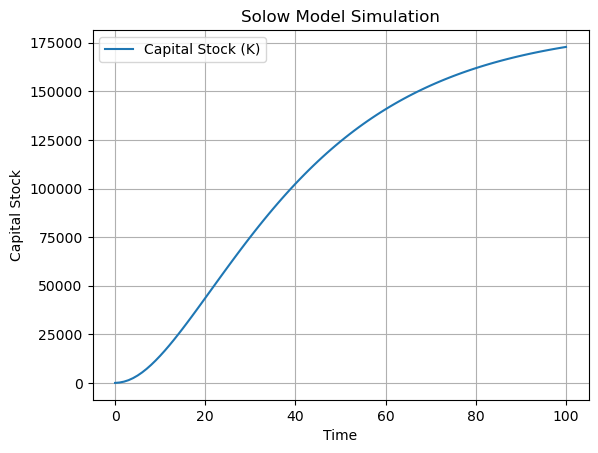

In [2]:
import matplotlib.pyplot as plt

class SolowModel:
    def __init__(self, s=0.3, n=0.02, delta=0.05, alpha=0.5, L=100, K0=50, T=100):
        self.s = s  # savings rate
        self.n = n  # population growth rate
        self.delta = delta  # depreciation rate
        self.alpha = alpha  # capital share of output
        self.L = L  # labor force
        self.K0 = K0  # initial capital
        self.T = T  # number of periods
        
    def steady_state_capital(self):
        return ((self.s * self.L) / (self.delta + self.n))**(1 / (1 - self.alpha))
    
    def solow_model(self, K):
        return self.s * self.L * (K**self.alpha) - (self.delta + self.n) * K
    
    def simulate(self):
        K = np.zeros(self.T+1)
        K[0] = self.K0
        for t in range(self.T):
            K[t+1] = K[t] + self.solow_model(K[t])
        return K
    
    def plot_simulation(self, K):
        t = np.arange(self.T+1)
        plt.plot(t, K, label='Capital Stock (K)')
        plt.xlabel('Time')
        plt.ylabel('Capital Stock')
        plt.title('Solow Model Simulation')
        plt.legend()
        plt.grid(True)
        plt.show()

# Main code
solow = SolowModel()
print("Steady State Capital:", solow.steady_state_capital())
K = solow.simulate()
solow.plot_simulation(K)


We now plot the steady state into the graph.

Steady State Capital: 183673.4693877551


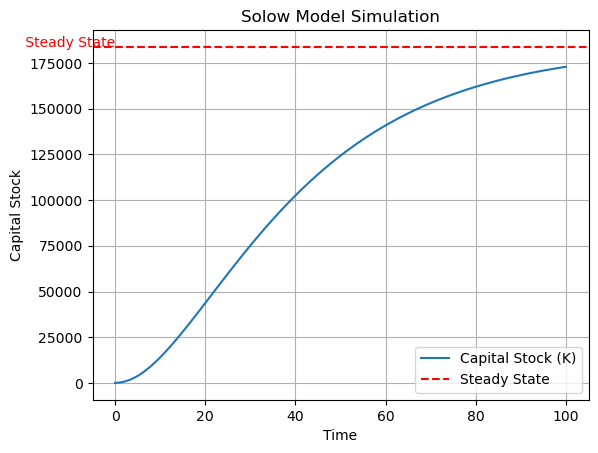

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

class SolowModel:
    def __init__(self, s=0.3, n=0.02, delta=0.05, alpha=0.5, L=100, K0=50, T=100):
        self.s = s  # savings rate
        self.n = n  # population growth rate
        self.delta = delta  # depreciation rate
        self.alpha = alpha  # capital share of output
        self.L = L  # labor force
        self.K0 = K0  # initial capital
        self.T = T  # number of periods
        
    def steady_state_capital(self):
        return ((self.s * self.L) / (self.delta + self.n))**(1 / (1 - self.alpha))
    
    def solow_model(self, K):
        return self.s * self.L * (K**self.alpha) - (self.delta + self.n) * K
    
    def simulate(self):
        K = np.zeros(self.T+1)
        K[0] = self.K0
        for t in range(self.T):
            K[t+1] = K[t] + self.solow_model(K[t])
        return K
    
    def plot_simulation(self, K):
        t = np.arange(self.T+1)
        plt.plot(t, K, label='Capital Stock (K)')
        
        # Calculate and plot the steady state
        steady_state = self.steady_state_capital()
        plt.axhline(y=steady_state, color='r', linestyle='--', label='Steady State')
        plt.text(0, steady_state, ' Steady State', color='r', fontsize=10, ha='right')
        
        plt.xlabel('Time')
        plt.ylabel('Capital Stock')
        plt.title('Solow Model Simulation')
        plt.legend()
        plt.grid(True)
        plt.show()

# Main code
solow = SolowModel()
print("Steady State Capital:", solow.steady_state_capital())
K = solow.simulate()
solow.plot_simulation(K)


We can also solve the model theoretical

In [5]:
import sympy as sp

# Define symbols
k_star = sp.symbols('k_star', real=True, positive=True)
s, n, delta, alpha = sp.symbols('s n delta alpha', real=True, positive=True)

# Define the steady-state equation
steady_state_eq = sp.Eq(s * k_star**alpha - (n + delta) * k_star, 0)

# Solve for the steady state of capital per worker
steady_state_solution = sp.solve(steady_state_eq, k_star)

# Display the solution
print("Steady State of Capital per Worker (k*):")
display(steady_state_solution)

Steady State of Capital per Worker (k*):


[((delta + n)/s)**(1/(alpha - 1))]

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 